In [118]:
from cProfile import label
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from sympy import *
import scipy as sp
import sys
sys.path.append('..')

from libka import *

In [119]:
df = pd.read_csv("in/hysteresis.csv", names = ["Tset", "T", "x", "y"], header = 0)
TK = 273.15 # K
C1 = 470 * 10**(-9) # F
A = 20 * 10**(-6) # m^2
d = 0.8 * 10**(-3) # m

ux = typeB(0.2/5, 0.2/5/2)
uy = typeB(5/5, 5/5/2)

In [120]:
df.insert(2, "TK", df["T"] + TK)
df.insert(3, "uT K", 0.1/np.sqrt(3))

df["Uc V"] = df["x"] / 2
df["uUc"] = ux/2
df["Uy mV"] = df["y"]/2 
df["uUy mv"] = uy/2
df["Uy V"] = df["Uy mV"]/1000
df["uUy V"] = uy/2000

df["P"] = df["Uy V"] * C1 / A
df["uP"] = df["uUy V"] *C1/A
df["Ec"] = df["Uc V"] / d
df["uEc"] = df["uUc"] / d



In [121]:
df

,Tset,T,TK,uT K,x,y,Uc V,uUc,Uy mV,uUy mv,Uy V,uUy V,P,uP,Ec,uEc
0,22,32.0,305.15,0.057735,1.2,5.6,0.6,0.01291,2.8,0.322749,0.0028,0.000323,0.000066,0.000008,750.0,16.137431
1,26,31.9,305.05,0.057735,1.2,5.6,0.6,0.01291,2.8,0.322749,0.0028,0.000323,0.000066,0.000008,750.0,16.137431
2,30,31.7,304.85,0.057735,1.2,5.6,0.6,0.01291,2.8,0.322749,0.0028,0.000323,0.000066,0.000008,750.0,16.137431
3,34,33.3,306.45,0.057735,1.2,5.6,0.6,0.01291,2.8,0.322749,0.0028,0.000323,0.000066,0.000008,750.0,16.137431
4,38,37.2,310.35,0.057735,1.2,5.8,0.6,0.01291,2.9,0.322749,0.0029,0.000323,0.000068,0.000008,750.0,16.137431
5,42,41.1,314.25,0.057735,1.2,5.8,0.6,0.01291,2.9,0.322749,0.0029,0.000323,0.000068,0.000008,750.0,16.137431
6,46,45.0,318.15,0.057735,1.0,6.0,0.5,0.01291,3.0,0.322749,0.0030,0.000323,0.000071,0.000008,625.0,16.137431
7,48,47.0,320.15,0.057735,1.0,6.0,0.5,0.01291,3.0,0.322749,0.0030,0.000323,0.000071,0.000008,625.0,16.137431
8,49,48.0,321.15,0.057735,1.0,6.2,0.5,0.01291,3.1,0.322749,0.0031,0.000323,0.000073,0.000008,625.0,16.137431
9,50,49.0,322.15,0.057735,0.8,6.0,0.4,0.01291,3.0,0.322749,0.0030,0.000323,0.000071,0.000008,500.0,16.137431


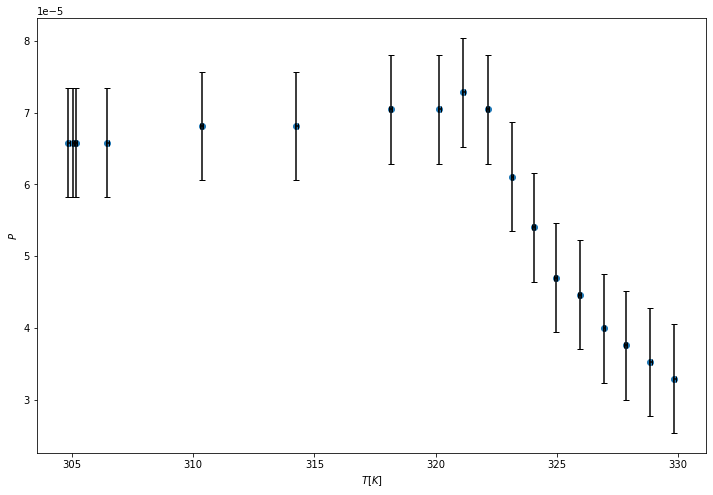

In [122]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df["TK"], df["P"], label = "P")

ax.errorbar(df["TK"], df["P"], xerr = df["uT K"], yerr = df["uP"], fmt = "none", label = "P", capsize=3, ecolor="black")

ax.set_xlabel(r"$T[K]$")
ax.set_ylabel(r"$P$")

fig.savefig("out/p.jpg", dpi = 1600)
plt.show()


In [123]:
Tc = df["TK"].iloc[8]
Tc

321.15

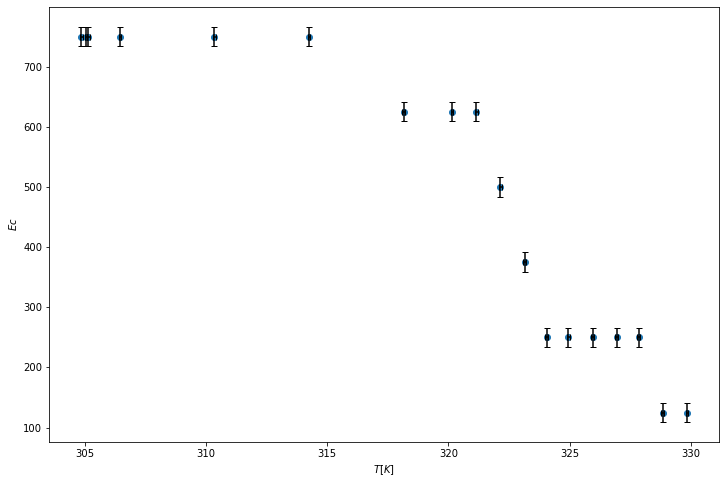

In [124]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df["TK"], df["Ec"], label = "Ec")

ax.errorbar(df["TK"], df["Ec"], xerr = df["uT K"], yerr = df["uEc"], fmt = "none", label = "Ec", capsize=3, ecolor="black")

ax.set_xlabel(r"$T[K]$")
ax.set_ylabel(r"$Ec$")

fig.savefig("out/ec.jpg", dpi = 1600)
plt.show()